In [1]:
import numpy as np
import scipy.stats as stats

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "/Users/marcpabst/miniforge3/bin/python"
  * The NumPy version is: "1.21.1"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/marcpabst/miniforge3/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so, 2): Library not loaded: @rpath/libcblas.3.dylib
  Referenced from: /Users/marcpabst/miniforge3/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so
  Reason: image not found


In [2]:
quantiles = np.array([0.2, 0.2, 0.6])  # specify quantiles

stats.dirichlet.pdf(quantiles, alpha)

0.2843831684937255

In [88]:
np.min(np.array([x, z, y]))

1.1102230246251565e-16

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)


# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                           np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1)
                                               for (xx, aa)in zip(x, self._alpha)])


def draw_pdf_contours(dist, nlevels=200, subdiv=7, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)

    plt.axis('off')

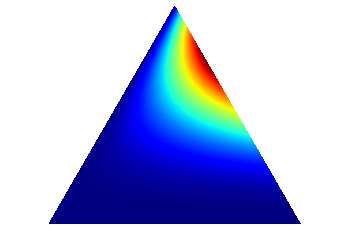

In [183]:
draw_pdf_contours(Dirichlet([1, 2, 4]))


In [2]:
import math, datetime
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
base = importr('base')

mtcars = data(datasets).fetch('mtcars')['mtcars']

PackageNotInstalledError: The R package "ggplot2" is not installed.

In [1]:
%load_ext rpy2.ipython

/Users/marcpabst/miniforge3/lib/python3.9/site-packages/rpy2/ipython/rmagic.py:81: UserWarning: The Python package `pandas` is strongly recommended when using `rpy2.ipython`. Unfortunately it could not be loaded, as we did not manage to load `numpy` in the first place (error: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "/Users/marcpabst/miniforge3/bin/python"
  * The NumPy version is: "1.21.1"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/marcpabst/miniforge3/lib/python3.9/site-packages/numpy

NameError: name 'pandas' is not defined

In [13]:
dd = 3

In [20]:
%%R 
install.packages('ggplot2')
#library(ggplot2)

R[write to console]: Installiere Paket nach ‘/Users/marcpabst/Library/R/arm64/4.1/library’
(da ‘lib’ nicht spezifiziert)

R[write to console]: versuche URL 'https://mirror.marwan.ma/cran/src/contrib/ggplot2_3.3.5.tar.gz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 3063309 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

Fehler in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]) : 
  es gibt kein Paket namens ‘fansi’
Ruft auf: <Anonymous> ... loadNamespace -> withRestarts -> withOneRestart -> doWithOneRestart
Ausführung angehalten
